## Аналитика в авиакомпании

### Ознакомление с данными и изучение информации

In [1]:
import pandas as pd #импорт библиотеки pandas
import matplotlib.pyplot as plt #импорт библиотеки matplotlib для работы с графиками
import seaborn as sns #импорт библиотеки seaborn для расширенной работы с графиками

In [2]:
query1 = pd.read_csv('/datasets/query_1.csv') #датасет для первого среза

In [3]:
query3 = pd.read_csv('/datasets/query_3.csv') #датасет для второго среза

In [4]:
query1.info()
#первичное представление о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
query3.info()
#первичное представление о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
query1.head(10)
#первые десять строчек датасета

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [7]:
query3.head(10)
#первые десять строчек датасета

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [8]:
#проверяю количество пропущенных значений в обоих датасетах
query1.isna().sum()
query3.isna().sum()
#пропущенных значений нет

city               0
average_flights    0
dtype: int64

In [9]:
#проверим каждый столбец таблицы query1 на наличие и количество уникальных значений
print(len(query1['model'].unique()))

print(len(query1['flights_amount'].unique()))

8
8


In [10]:
#проверим каждый столбец таблицы query3 на наличие и количество уникальных значений
print(len(query3['city'].unique()))

print(len(query3['average_flights'].unique()))

101
60


In [11]:
#проверяю query1 на наличие дубликатов
query1.duplicated().sum()

0

In [12]:
#проверяю query3 на наличие дубликатов
query3.duplicated().sum()

0

### Вывод

##### До начала работы было сделано:
1. Импортирована библиотка pandas для работы с данными;
2. Импортированы библиотеки matplotlib и seaborn для работы с графиками. 

##### Предварительная работа с данными:
1. Для обоих датасетов созданы переменные query1 и query3 соответственно;
2. Получено первичное представление об обоих датасетах методом df.info() и выведены певрвые десять строк;
3. Для каждого столбца каждого датасета было определено и подсчитано количество уникальных и пропущенных значений, а также выполнена проверка на дубликаты и на пропуски в данных.

##### Датасет query1

##### Количество элементов - 8, количество уникальных значений - 16, количество столбцов - 2, типы данных - object и int.

##### Наименование столбцов и обнаруженные в них ошибки:

'model' - модель самолета и 'flights_amount' - количество рейсов для каждой модели самолета

##### Пропусков, дубликатов и уникальных значений в столбце не обнаружено.

##### Датасет query3

##### Количество элементов - 101, количество уникальных значений - 161, количество столбцов - 2, типы данных - object и float.

##### Наименование столбцов и обнаруженные в них ошибки:

'city' - город и 'average_flights' - среднее количество рейсов для каждого города

##### Пропуски, дубликаты и уникальные значения в столбце не обнаружены, однако тип данных столбца 'average_flights' нужно привести к целочисленному.

##### В процессе работы необходимо будет:
1. Привести тип данных в столбце 'average_flights' датасета query3 к целочисленному;
2. Определить топ-10 городов по количеству рейсов;
3. Построить графики для следующих показателей: модель самолета и количество рейсов, город и количество рейсов, топ-10 городов по количеству рейсов;.
4. Проанализировать графики и написать по каждому вывод;
5. Написать общий вывод. 

### Предобработка данных

In [13]:
#данные столбца 'average_flights' датасета query3 приведем к целочисленным показателям
query3['average_flights'] = query3['average_flights'].astype('int')

#### По итогу шага были выполнены все необходимые операции.

### Анализ данных

In [14]:
#выберем топ10 городов по количеству рейсов
top10_city = query3.sort_values(by='average_flights', ascending=False).head(10)
top10_city

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


#### Топ-10 городов по количеству рейсов:
1.Москва - 129 рейсов; 2.Санкт-Петербург - 31 рейс; 3.Новосибирск - 17 рейсов; 4.Екатеринбург - 11 рейсов; 5.Красноярск - 11 рейсов; 6.Пермь - 10 рейсов; 7.Ростов-на-Дону - 10 рейсов; 8.Брянск - 10 рейсов; 9.Ульяновск - 9 рейсов; 10.Советский - 9 рейсов. 

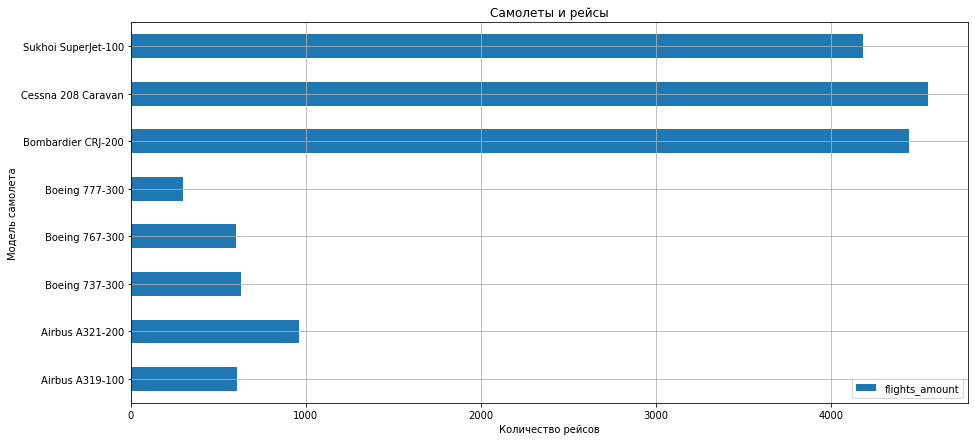

In [15]:
#строю график для моделей самолетов и количества рейсов
query1.plot(kind = 'barh', x='model', y='flights_amount', grid=True, figsize=(15,7), title = 'Самолеты и рейсы')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.show()

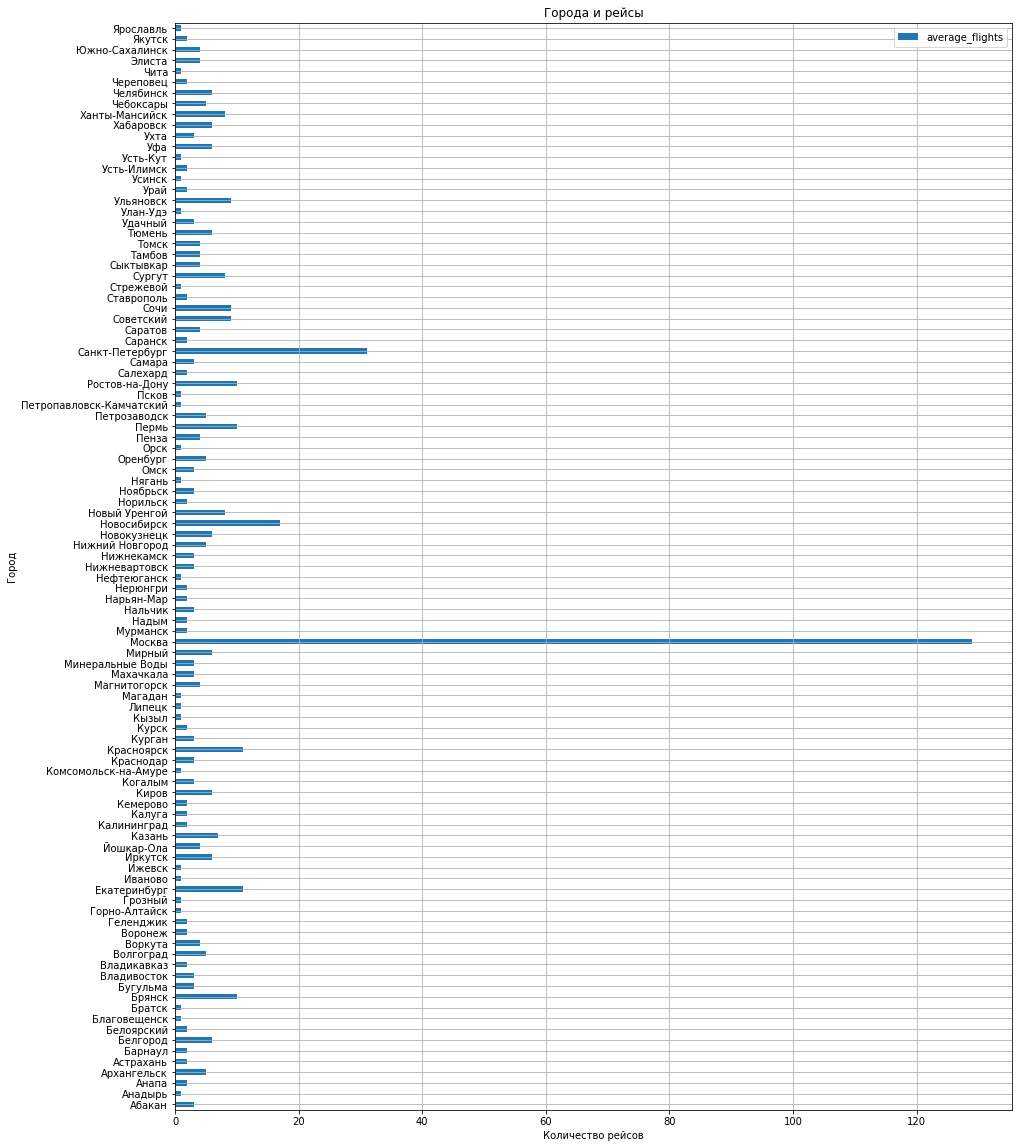

In [16]:
#строю график для городов и количества рейсов
query3.plot(kind = 'barh', x='city', y='average_flights', grid=True, figsize=(15,20), title = 'Города и рейсы')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show()

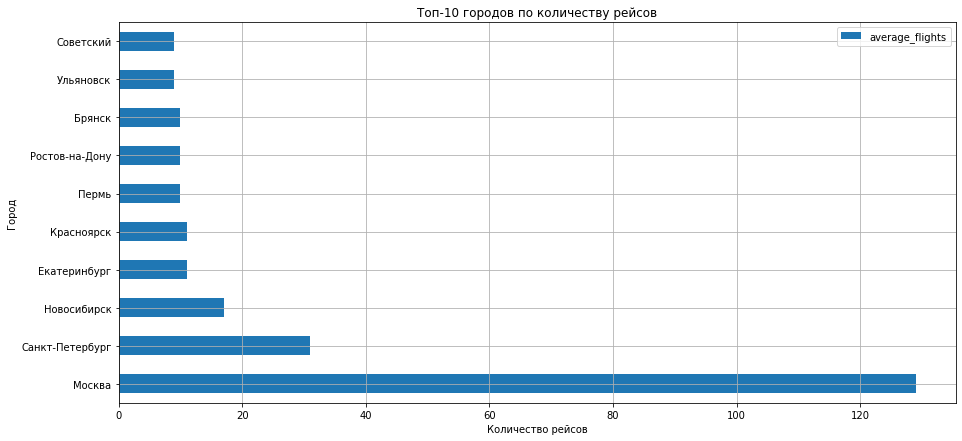

In [17]:
#строю график для топ10 городов по количеству рейсов
top10_city.plot(kind='barh', x='city', y='average_flights', grid = True, figsize=(15,7), title = 'Топ-10 городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show()

#### Выводы по графикам:

##### Модели самолетов и количество рейсов:
1. Больше всего рейсов совершается с использованием моделей - Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Суммарное количество рейсов для каждого превышает 4 тысячи.
2. Оставшиеся модели самолетов распределены между собой более-менее равномерно. Их суммарное количество для каждой модели не превышет 1 тысячу рейсов, где исключение составляет лишь Airbus A321-200, который почти добрался до тысячи рейсов.

##### Города и количество перелетов:
1. Лидерами по городам с наибольшим количеством рейсов являются Москва и Санкт-Петербург - 129 и 31 рейс в день соответственно;
2. Остальные города распределены равномерно между собой и не превышают 20 рейсов в день.

##### Топ-10 городов по количеству рейсов:
1. Лидерами опять являюстя Москва и Санкт-Петербург;
2. Оставшиеся города распределены равномерно между собой.

##### Общие выводы по графиками:
1. Наиболее популярные модели самолетов, осуществляющих рейсы, являются: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100;
2. Городами-лидерами по количеству осуществляемых рейсов в день являются: Москва и Санкт-Петербург. Это может быть обусловнено тем, что в этих городах наиболее сильно развиты как туристическое сообщение, так и международное. Плюс, если мы исследуем в контексте фестивалей, то, опять-таки, в этих городах фестивалей проводится больше, чем в остальных.

##### По итогу шага выполнены все поставленные задачи.

### Общий вывод

##### Количество уникальных значений для query1 - 16.
##### Количество уникальных значений для query3 - 161.

##### Топ-10 городов по количеству рейсов в день:
1.Москва - 129 рейсов; 2.Санкт-Петербург - 31 рейс; 3.Новосибирск - 17 рейсов; 4.Екатеринбург - 11 рейсов; 5.Красноярск - 11 рейсов; 6.Пермь - 10 рейсов; 7.Ростов-на-Дону - 10 рейсов; 8.Брянск - 10 рейсов; 9.Ульяновск - 9 рейсов; 10.Советский - 9 рейсов. 

##### Что говорят графики:
1. Наиболее популярные модели самолетов, осуществляющих рейсы, являются: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100;
2. Городами-лидерами по количеству осуществляемых рейсов в день являются: Москва и Санкт-Петербург. Это может быть обусловнено тем, что в этих городах наиболее сильно развиты как туристическое сообщение, так и международное. Плюс, если мы исследуем в контексте фестивалей, то, опять-таки, в этих городах фестивалей проводится больше, чем в остальных.

#### По итогу работы были проведены все необходимые вычисления и выполнены поставленные задания.